## Import the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

Dataset: (Binary Classification)
Based on Age and estimated salary, predict whether a customer will buy an SUV or not.

After we get a prediction, we will target the customers on Social Networks with advertisements of the SUV (Marketing)

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
len(dataset)

400

In [4]:
dataset.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
# Check for missing values
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# Remove duplicate rows -- avoid peeking
dataset.drop_duplicates(inplace=True)

In [7]:
len(dataset)

367

### Split the dataset into Features and Labels

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
X.shape, y.shape

((367, 2), (367,))

## Split the dataset into Train and Test Set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((293, 2), (293,), (74, 2), (74,))

In [12]:
print(X_train)

[[    24  58000]
 [    52  90000]
 [    36 118000]
 [    53 104000]
 [    36 144000]
 [    36  99000]
 [    47  49000]
 [    41  45000]
 [    36  50000]
 [    24  32000]
 [    51  23000]
 [    54  26000]
 [    48 119000]
 [    60 108000]
 [    48 138000]
 [    58  38000]
 [    36 125000]
 [    48  41000]
 [    59 143000]
 [    50  88000]
 [    52 150000]
 [    35  59000]
 [    37  72000]
 [    22  63000]
 [    19  85000]
 [    20  86000]
 [    57  33000]
 [    18  86000]
 [    54 104000]
 [    32 117000]
 [    45  26000]
 [    40  72000]
 [    31  76000]
 [    38  65000]
 [    41  52000]
 [    42  80000]
 [    26  86000]
 [    49  39000]
 [    46  22000]
 [    37  79000]
 [    37  62000]
 [    33  41000]
 [    52 138000]
 [    29  75000]
 [    46  82000]
 [    30  62000]
 [    35  20000]
 [    32 100000]
 [    25  33000]
 [    48 141000]
 [    48  90000]
 [    37  33000]
 [    33  31000]
 [    37 137000]
 [    19  25000]
 [    49  89000]
 [    39 106000]
 [    27  90000]
 [    59 13000

In [13]:
print(y_train)

[0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0]


## Feature Scaling

Estimated salary values are much larger than age

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)

[[-1.32840302 -0.36423447]
 [ 1.28319975  0.54572087]
 [-0.20914469  1.34193179]
 [ 1.37647128  0.94382633]
 [-0.20914469  2.0812705 ]
 [-0.20914469  0.80164581]
 [ 0.81684211 -0.62015941]
 [ 0.25721295 -0.73390383]
 [-0.20914469 -0.5917233 ]
 [-1.32840302 -1.10357318]
 [ 1.18992822 -1.35949812]
 [ 1.46974281 -1.27418981]
 [ 0.91011364  1.37036789]
 [ 2.02937197  1.05757075]
 [ 0.91011364  1.91065388]
 [ 1.84282892 -0.93295656]
 [-0.20914469  1.54098452]
 [ 0.91011364 -0.84764824]
 [ 1.93610044  2.0528344 ]
 [ 1.0966567   0.48884866]
 [ 1.28319975  2.25188713]
 [-0.30241622 -0.33579836]
 [-0.11587316  0.03387099]
 [-1.51494607 -0.22205395]
 [-1.79476065  0.40354035]
 [-1.70148913  0.43197645]
 [ 1.74955739 -1.07513708]
 [-1.88803218  0.43197645]
 [ 1.46974281  0.94382633]
 [-0.5822308   1.31349569]
 [ 0.63029906 -1.27418981]
 [ 0.16394142  0.03387099]
 [-0.67550233  0.14761541]
 [-0.02260163 -0.16518174]
 [ 0.25721295 -0.5348511 ]
 [ 0.35048448  0.26135983]
 [-1.14185996  0.43197645]
 

In [16]:
print(X_test)

[[-0.11587316  0.00543489]
 [ 1.00338517  0.48884866]
 [-1.23513149  0.23292372]
 [ 0.81684211 -1.16044539]
 [ 0.07066989 -0.81921214]
 [ 0.72357059  0.0907432 ]
 [-0.30241622 -0.76233993]
 [ 1.74955739 -0.30736226]
 [-0.11587316  2.13814271]
 [-1.04858844  0.37510424]
 [ 0.07066989 -0.27892616]
 [ 0.25721295 -1.16044539]
 [-0.30241622 -0.27892616]
 [ 0.35048448 -0.47797889]
 [-0.20914469 -0.30736226]
 [-0.30241622  0.57415697]
 [ 0.07066989  0.23292372]
 [-1.14185996 -1.01826487]
 [ 1.00338517  0.43197645]
 [-1.04858844  0.71633749]
 [-0.86204538 -0.27892616]
 [ 0.91011364  0.71633749]
 [-1.23513149  0.46041256]
 [ 1.00338517  1.99596219]
 [ 0.91011364 -1.16044539]
 [ 2.02937197 -0.81921214]
 [-1.23513149  0.26135983]
 [ 0.16394142  0.00543489]
 [ 0.16394142 -0.33579836]
 [ 0.07066989  1.79690946]
 [-1.14185996  0.37510424]
 [-1.04858844  0.51728476]
 [-0.86204538  0.26135983]
 [-1.14185996  0.03387099]
 [-1.42167454 -0.64859551]
 [-1.04858844 -0.36423447]
 [-1.42167454 -0.13674563]
 

## Train model on train set

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting on Test Set result


In [18]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# [predicted actual]
# [0 0], [1 1] --> correct predictions
# [1 0], [0 1] --> wrong predictions

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


## Classification Evaluation Metrics and Classification Matrix

In [19]:
# Function to plot confusion matrix using Seaborn's heatmap()

def plot_confusion_matrix(confuse_matrix):
  fig,ax = plt.subplots(figsize=(8,6))

  # Set the font scale
  sns.set(font_scale=1.5)

  ax = sns.heatmap(
      confuse_matrix,
      annot=True, # Annote the boxes
      cbar=False
  )

  plt.ylabel("True label")
  plt.xlabel("Predicted label")

In [20]:
from sklearn.metrics import confusion_matrix

confuse_matrix = confusion_matrix(y_test,y_pred) # compare actual labels (test) with predicted labels
print(confuse_matrix)

[[45  2]
 [ 8 19]]


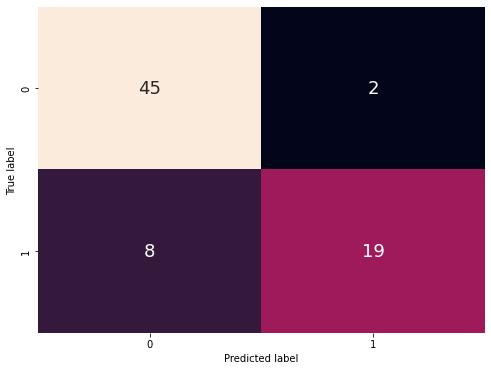

In [21]:
plot_confusion_matrix(confuse_matrix)

when predict = 0 and actual = 0, we have 45 samples (correct samples)

when predict = 1 and actual = 1, we have 19 samples (correct samples)

false +ve --> when predict = 1 and actual = 0

false -ve --> when predict = 0 and actual = 1

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred) 
    f1 = f1_score(y_test,y_pred)

    metric_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    } # A dictionary that stores the results of the evaluation metrics
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [23]:
model_metrics = evaluate_preds(y_test, y_pred)

Acc: 86.49%
Precision: 0.90
Recall: 0.70
F1 score: 0.79


## Predicting a new result

Age - 30, Estimated salary - $87000

In [24]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


Naive Bayes is a non-linear classifier.

It causes less overfitting, so sometimes it may perform better than other models

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


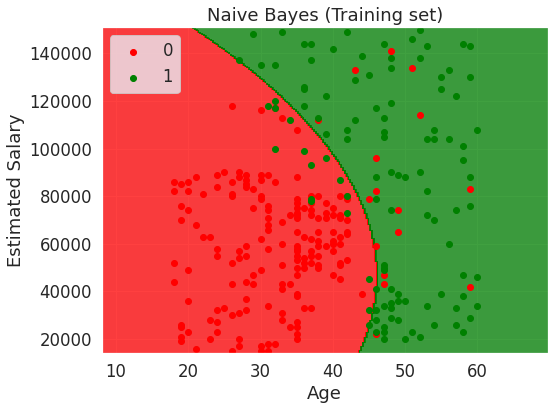

In [25]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


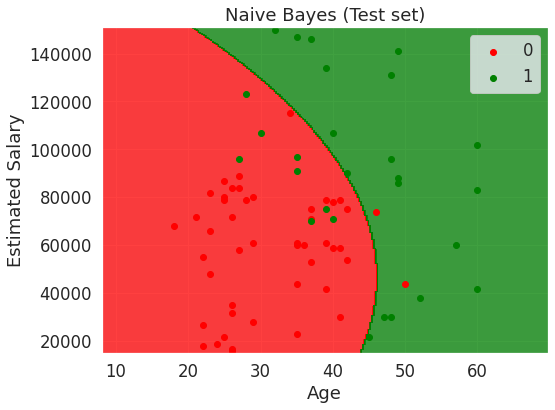

In [26]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [27]:
# GridSearchCV will refit the estimator, i.e. model object using the best found parameters on the whole dataset.

from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = params_NB,
                           scoring = 'accuracy', # evaluation metric. 'accuracy' for classification here 
                           cv = 10, # k = 10, no. of k-train test folds - cross validation technique 
                           verbose=2, # print out the results
                           n_jobs = -1) # set processor of machine. -1 --> means all processor will be in  use 

# GridSearchCV is only applied on train set
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [28]:
# get best accuracy, and the set of parameters that led to that best accuracy
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.43 %
Best Parameters: {'var_smoothing': 0.006579332246575682}


In [29]:
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_estimator)

Best Parameters: GaussianNB(priors=None, var_smoothing=0.006579332246575682)


In [30]:
y_pred_tune = grid_search.best_estimator_.predict(X_test) 